# Problems from Mahan's Many Particle Physics
## Problem 1
Solve the classical vibrational modes of a one D chain of atoms of type A and B they alternate on the chain with masses $m_A$ and $m_B$. The spring between the atoms has spring constant K.

 
## Approach:
The classical hamiltonian for the phonon in a diatomic chain is:
$$
H = \sum_{\substack{i}}(P_{i}^2/(2*m_A)+P_{i+1}^2/(2*m_B) + K*(x_i-x_{i+1})^2) \tag{1.1}
$$
Leading to the following equations of motion: 
$$
m_A\"x_i = K*(2*x_i-x_{i+1}-x_{i-1}), i = 0,2,4,6,8 \tag{1.2}
$$
$$
m_B\"x_{i} =  K*(2*x_{i}-x_{i+1}-x_{i-1}), i = 1,2,3,4 \tag{1.3}
$$
using a plane-wave ansatz we can find a solution directly (seen in Ibach Luth page 64)
Giving the result: 

$$
\sqrt{K*(\frac{1}{m_a}+\frac{1}{m_b})\pm K*\sqrt{(\frac{1}{m_a}+\frac{1}{m_b})^2-\frac{4}{m_a*m_b}*sin^2(\pi*2*k*a/2)}} \tag{1.4}
$$
or alternatively we can find eigensolutions to a large enough equivalent matrix (see below)


In [1]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt 

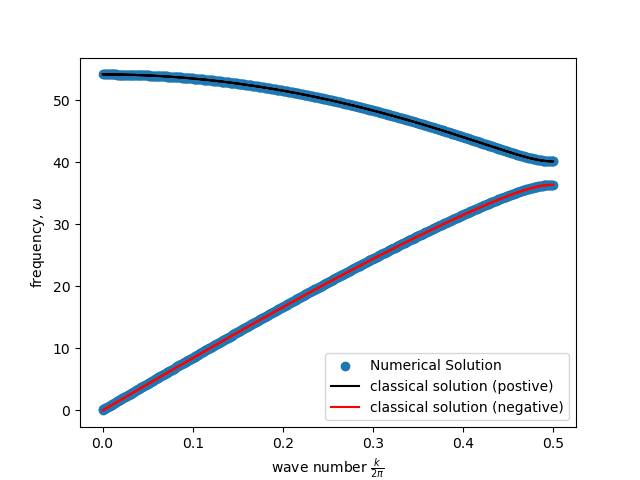

In [2]:
m_a = 1.24#mass of atom type b
m_b = 1.51 #mass of atom type  a
#m_c = 1.5 #mass of atom type c
K = 1000 #spring constant

N = 1000# number of a lattice sites 
a = 2#3#atomic distance per lattice constant
A = np.asarray([[K/m_a*(i%2==0)*(2*(j==i)-(j==i+1)-(j==i-1))
      +K/m_b*(i%2==1)*(2*(j==i)-(j==i+1)-(j==i-1))for i in range(N)] for j in range (N)]) 

#A = np.asarray([[K/m_a*(i%3==0)*(2*(j==i)-(j==i+1)-(j==i-1))
#      +K/m_b*(i%3==1)*(2*(j==i)-(j==i+1)-(j==i-1))+K/m_c*(i%3==2)*(2*(j==i)-(j==i+1)-(j==i-1))for i in range(N)] for j in range (N)]) 
# uncomment for triatomic chain 
omega,fx = np.linalg.eig(A)
k = np.fft.fftfreq(N,a)#generate spatial frequency space
f = np.asarray([np.ceil(i*a/N)%2*((i%np.floor(N/a))/(N))+np.floor(i*a/N)%2*(1/a -(i%np.floor(N/a))/(N)) for i in range(N)])
fig,ax = plt.subplots()
ax.scatter(abs(f),np.sqrt(np.sort(omega)),label = 'Numerical Solution')
#plt.scatter(-abs(k),np.sqrt(np.sort(omega)),label = 'Numerical Solution')
ax.plot(abs(f),np.sqrt(K*(1/m_a+1/m_b)+K*np.sqrt((1/m_a+1/m_b)**2-4/(m_a*m_b)*np.sin(np.pi*f)**2)),color='k',label='classical solution (postive)')
ax.plot(abs(f),np.sqrt(K*(1/m_a+1/m_b)-K*np.sqrt((1/m_a+1/m_b)**2-4/(m_a*m_b)*np.sin(np.pi*f)**2)),color='r',label='classical solution (negative)')
ax.set_xlabel(r'wave number $\frac{k}{2\pi}$')
ax.set_ylabel(r"frequency, $\omega$")
ax.legend()


## Problem 2: 
Write down the Hamiltonian of problem 1, solve it quantum mechanically and show that it may be reduced to the form 
$$
H  =\sum_{\substack{k,\lambda}} \omega_{k,\lambda}(a_{k,\lambda} a^\dagger_{k,\lambda} +\frac{1}{2}) \tag{2.1}
$$ 
where $\omega_{k,\lambda}$ are the classic normal mode frequencies. 





## Approach:  
Before we move onto converting into the creation and annihilation operators we should think about the previous approach a to solving the EOM for this system and what they tell us about the transformation into the wave number basis. So from the classical EOM in the frequency basis we have: 
$$ 
m_\sigma\omega_{\lambda,k}^2x_{\sigma,-k} = 2Kx_{\sigma,-k}+Kx_{\sigma \pm 1,-k}+Kx_{\sigma \pm 1,-k}e^{\sigma ika} \tag{2.2}
$$
where +(-) coordinates to $\sigma = 1 (0)$, a careful note on this is that the lambda coordinate is a eigenvalue solution which relies on a special relation between x terms which corresponds to different directions of motion for the phonons. the top branch lambda 0 being a synchronized motion state near zero and lambda 0 being out of sync. The mass of the solution however will vary as normal Starting from the position space Hamiltonian:  
$$
H = \sum_{\substack{i,\sigma}} \frac{1}{2M_{i,\sigma}} p_{i,\sigma}^2 + \frac{K}{2} (x_{i,\sigma}+x_{i,\sigma \pm 1})^2 \tag{2.3}
$$
With expanding 2.3 we can rewrite the equation as:
$$ 
H = \sum_{\substack{i,\sigma}} \frac{1}{2M_{i,\sigma}} p_{i,\sigma}^2 +(...)  \frac{K}{2} (x_{i,0}-=x_{i, 1})^2+(x_{i-1,1}-x_{i,0})^2+(x_{i+1,0}-x_{i, 1})^2 (...) \tag{2.4}
$$
Now grouping like terms with shared 
$$
H = \sum_{\substack{i,\sigma}} \frac{1}{2M_{i,\sigma}} p_{i,\sigma}^2 + (...) \frac{K}{2} (\color{green}{x_{i,0}x_{i,0}+x_{i,0}x_{i,1}}+\color{orange}{x_{i,1}x_{i,0}+x_{i,1}x_{i,1}}+\color{red}{x_{i-1,1}x_{i-1,1}-x_{i-1,1}x_{i,0}}-\color{green}{x_{i,0}x_{i-1,1}+x_{i,0}x_{i,0}} +\color{blue}{x_{i+1,0}x_{i+1,0}}+x_{i+1,0}x_{i,1}+\color{orange}{x_{i,1}x_{i+1,0}+x_{i,1}x_{i,1}}      \tag{2.5}
$$ 
Now we rearrange the sum slightly keeping the same indices but grouping by first term (color coded in eq 2.5) only showing only the orange and green terms and absorbing other terms into the sum 
$$
H = \sum_{\substack{j,\sigma}} \frac{1}{2M_{j,\sigma}} p_{j,\sigma}^2 + \sum_{\substack{j}} \frac{K}{2} (\color{green}{2*x_{j,0}x_{j,0}+x_{j,0}x_{j,1}+x_{j,0}x_{j-1,1}}+\color{orange}{2*x_{j,1}x_{j,1}+x_{j,1}x_{j,0}+x_{j,1}x_{j+1,0}} \color{white}{)}   \tag{2.6}
$$
Now we will transform into the frequency space using the following relations where we are shifting x from the ion basis $\sigma$ to the eigenstate basis $\lambda$ through an identity transform. the momentum stays the same between basis: 
$$ 
\sum_{\substack{\sigma}}p_{j\sigma} \equiv \frac{1}{\sqrt{N}}\sum_{\substack{k,\lambda}} p_{k\lambda}e^{-i k a j } \tag{2.7a}
$$ 
$$
\sum_{\substack{\sigma}}x_{j\sigma} \equiv \frac{1}{\sqrt{N}}\sum_{\substack{k,\lambda}} x_{k\lambda}e^{i k a j } \tag{2.7b}
$$
Now lets recall a few relations like those in 1.63 of mahan's book namely those bellow 1.63:
$$
p_{i\sigma}^2 = \sum_{\substack{k,\lambda}}p_{k\lambda}p_{-k\lambda} \tag{2.8a}
$$
$$
\sum_{\substack{\sigma}} x_{i,\sigma}x_{i+n,\sigma+\delta} = \sum_{\substack{k,\lambda}}x_{k,\lambda}x_{-k,\lambda+\delta}e^{-iank} \tag{2.8b}
$$
now lets apply the relation from 2.8 to the hamiltonian 2.6 then we have... 
$$
H = \sum_{\substack{j,\lambda}} \frac{1}{2M_{\lambda}} p_{k,\lambda}p_{-k,\lambda} +  2*x_{k,\lambda}x_{k,\lambda}+x_{k,\lambda}x_{k,\lambda \pm 1}+e^{iak}x_{k,\lambda}x_{k,\lambda \pm 1} \tag{2.9}
$$
substituting the relation 2.2 we have something similar to what is given in 1.64  
$$
H = \sum_{\substack{j,\lambda}} \frac{1}{2M_{\lambda}} p_{k,\lambda}p_{-k,\lambda} +  \frac{1}{2m_\lambda}m_\lambda*\omega_{k,\lambda}x_{k,\lambda} x_{-k,\lambda} 
$$
And in the home stretch we need an operator which measures both momentum and position operators proportionately so we generate $a$ and $a^{\dagger}$ as 
$$
p_{k,\lambda} = \sqrt{\frac{\hbar}{2*m_\lambda \omega_{k,\lambda}}} (a_{-k,\lambda}+ a^{\dagger}_{-k,\lambda})\\
x_{k,\lambda}^{\dagger} = \sqrt{\frac{\hbar}{2*m_\lambda \omega_{k,\lambda}}} (a_{k,\lambda}+ a^{\dagger}_{k,\lambda})
$$
Plugging in and a little bit of commutator massaging gets us the desired result of 
$$
H  =\sum_{\substack{k,\lambda}} \omega_{k,\lambda}(a_{k,\lambda} a^\dagger_{k,\lambda} +\frac{1}{2}) 
$$
## Expanding to application
Now lets think about how to use something this simple as a jumping off point for something actually useful lets consider a case where we perturb the system by drive some of the molecules on one end at a resonance frequency while isolating them from the rest of the chain allowing the chain to fully interact. So to start the initial positions states of the system would be a displacement that tapers off as it goes away from the end of the line. So we will describe the initial state using a Logistic function (similar to the fermi dirac distribution) 
$$
d_n =  sin(k*x)*d*e^{-k(n-n0)^2}
$$
Where $d_n$ is the initial displacement of the nth atom, d is the average initial displacement for each position, k is the sharpness of the the turn off n0 is the start point of the compression sin(k*x) represents the wavenumber state corresponding to the driving frequency.  



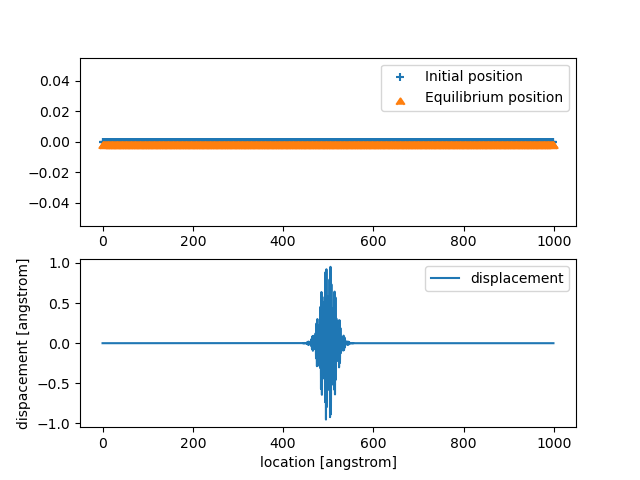

In [3]:
def FDfunc(n,tau,d,n0,k): 
    return np.sin(k*n)*d*np.exp(-tau*(n-n0)**2)
N =1000
n = np.arange(N)
tau= .2e-2
d= 1
n0 = N/2
k = np.pi*2*f[450]
fig,ax = plt.subplots(2)
ax[0].scatter(a*n/2+FDfunc(n,tau,d,n0,k),0*n,marker='+',label = 'Initial position')
ax[0].scatter(a*n/2,0*n,marker=6,label='Equilibrium position')
ax[1].plot(a*n/2,FDfunc(n,tau,d,n0,k),label='displacement')
ax[1].set_xlabel('location [angstrom]')
ax[1].set_ylabel('displacement [angstrom]')
ax[0].legend()
ax[1].legend()

## Calculation of eigenstate occupation:  
Now that we have the initial position states lets translate them into the eigen states of the linear chain so that they can be time evolved ...
Any positional state of the system should be able to be expressed as a sum of the eigenstates as they should form a basis. 
$$
\ket{\Psi} = \ket{\Psi}\sum_{\substack{i,\lambda}}\ket{i,\lambda}\bra{i,\lambda} \\
\ket{\Psi} = \sum_{\substack{i,\lambda}}\ket{i,\lambda}\braket{i,\lambda|\Psi}\\
\ket{\Psi} = \sum_{\substack{i,\lambda}}C_{i,\lambda}\ket{i,\lambda}
$$
where $\Psi$ is in our case the starting positional state and $\ket{i,\lambda}$ is a frequency eigenstate of the system Explicitly this constant $C_{i,\lambda}$ can be translated to: 
$$
C_{i,\lambda} = \sum_{n} d_n * d_{i,\lambda,n}
$$ 
Where n is the idex of the atomic position, d_n is the starting position state and $d_{i,\lambda}$ is eigen state positions. Now let's plot the constants $C_{i,\lambda}$ relative to the wavenumber k and branch $\lambda$ 


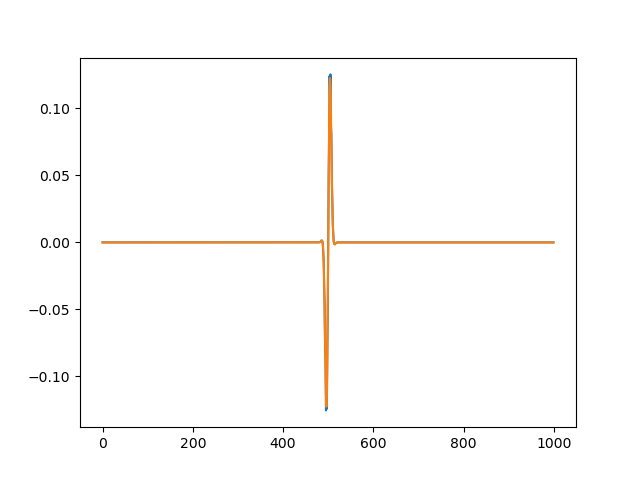

In [6]:
k = np.asarray([np.ceil(i*a/N)%2*((i%np.floor(N/a))/(N))+np.floor(i*a/N)%2*(1/a -(i%np.floor(N/a))/(N)) for i in range(N)])
lam = np.asarray([np.ceil(i*a/N)%2*0+np.floor(i*a/N)%2*1 for i in range(N)])
fig,ax = plt.subplots()

N =1000
n = np.arange(N)
tau= .02
d= .2
n0 = N/2
k = np.pi*2*f[40]
fxs = fx[:,np.argsort(omega)] 
d_n = FDfunc(n,tau,d,n0,k)
Cil = np.asarray([np.sum(d_n*fxs[:,i]) for i in range(N)])

calcD = np.sum([Cil[i]*fxs[:,i] for i in n],axis=0)
ax.plot(n,calcD)
ax.plot(n,d_n)

Now that we have the solution in the energy eigen space, we need to calculated how it should propagate, This can be done by applying a forward time step and a backwards time step to the system using the Hamiltonian of the system as follows...
The time dependant Schrödinger equation is given as follows:
$$
i \frac{d*\psi}{dt} = H \psi
$$
(we've been lazy theorists here and set $\hbar=1$) where \psi is some state comprised of a superposition of states which are eigen states of the Hamiltonian. The solution to this would then be the following relation: 
$$
\psi(t)  = e^{-iH*t} \psi(0)
$$
Now we can expand this if we are able to assume small time steps, so: 
$$
\psi(t+\Delta t)  = (1+iH*\Delta t+O(x^2)) \psi(t)
$$ 
This pushes us 1 time step into the future now to go back in time we apply the opposite transform
$$

\psi(t-\Delta t) = (1-iH*\Delta t+O(x^2)) \psi(t)
$$
![title](ifk2vu2f.bmp)

Now lets bring it together so we can make a combined step with a half step backwards and a half step forwards 
$$
(1-iH*\Delta t/2)*\psi(t+\Delta t) = (1+iH*\Delta t/2)\psi(t)
$$
$$
\psi(t+\Delta t) =  (1-iH*\Delta t/2)^{-1}(1+iH*\Delta t/2)\psi(t)
$$
This is the famous crank Nicolson propagator! Now we have to be careful in our elation as the first term in parenthesis on the rhs is an inverse of an operator so this is an implicit equation. meaning that we have to solve something to get back the solution we want unless... we are already in the basis as theres a fun feature in matrices for diagonal matrices which is: 
$$
A^{-1} = 
\begin{bmatrix}
1/a11 & 0     & (...) & (...) & 0\\
0     & 1/a22 & (...) & (...) & 0\\
0     & (...) & 1/aii & (...) & 0\\
0     & (...) & (...) & (...) & 1/ann\\

\end{bmatrix}
$$
Which already shows some serious benefits namely, if we don't need to solve the matrix inversion we save a significant amount compute time as now we no longer need to solve anything to propagate forward in time so in some specific bvp we now have a much faster method for creating time dependant simulations of complex phenomena. That is to say this is (within reason) replicable! So specifically how do we apply this in our case? so lets remind ourself of the expression we have derived for the Hamiltonian: 
$$
H  =\sum_{\substack{k,\lambda}} \omega_{k,\lambda}(a_{k,\lambda} a^\dagger_{k,\lambda} +\frac{1}{2}) 
$$
This can be reexpressed in matrix form as the following (with the states having been cast as unit vectors in an 2*N dimensional space).
$$
H= 
\begin{bmatrix}
\omega_{1,1} & 0     & (...) & (...) & 0\\
0     & \omega_{2,2} & (...) & (...) & 0\\
0     & (...) & \omega_{\lambda,n} & (...) & 0\\
0     & (...) & (...) & (...) & \omega_{\lambda,1}\\
\end{bmatrix}
$$
Now we can transform the state constants to propagate the initial state in the following way: 
$$
C_n(t+\Delta t) = (1-i\omega_{n}*\Delta t/2)^{-1}(1+i\omega_{n}*\Delta t/2)C_n(t) 
$$


C:\Users\mattl\AppData\Local\Temp\ipykernel_21204\1630302679.py:15: ComplexWarning: Casting complex values to real discards the imaginary part
  calcDi[:,i] = np.sum([Cn[i]*fxs[:,i] for i in n],axis=0)


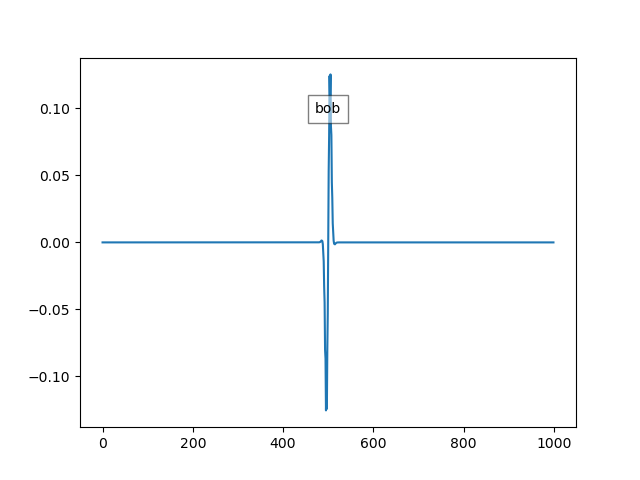

In [ ]:
from matplotlib.animation import FuncAnimation
Dt = .01
Ntimesteps= 100
def propagate(cn,omega,Dt):
    return (1-1.0j*np.sort(omega)*Dt/2)**(-1)*(1+1j*np.sort(omega)*Dt/2)*cn# 
Cn = Cil
fig,ax = plt.subplots()
n = np.arange(N)
ft = np.sum([Cn[i]*fxs[:,i] for i in n],axis=0)
ln, =ax.plot(n,ft)

calcDi = np.zeros((N,Ntimesteps))
for i in range(Ntimesteps):
    Cn = propagate(Cn,omega,Dt) 
    calcDi[:,i] = np.sum([Cn[i]*fxs[:,i] for i in n],axis=0)

title = ax.text(0.5,0.85, "bob", bbox={'facecolor':'w', 'alpha':0.5, 'pad':5},
                transform=ax.transAxes, ha="center")

def init(): 
    ax.set_ylim(-.2,.2)
    ax.set_xlim(0,1000)
    return ln,

def update(frame):
    ln.set_data(n,calcDi[:,frame])
    title.set_text(u"Timestep = {}".format(frame))
    return ln,title

ani = FuncAnimation(fig,update,frames=np.arange(Ntimesteps),init_func=init,blit=False)


## Brief discussion of Limitations 
So with a little bit of work we are able to simulated some simple processes however I would be remiss to note some limitations to this simulation method, For handling simulations with critically damped boundary conditions, this style of calculation will not work as it will always be cyclical. So for these there will need to be modifications to the effective hamiltonian, further for this particular case as there is granularity introduced by the division into atoms care should be taken for the frequency of exciting pulses, as the frequency resolution introduces some odd resonance effects to the system which are unrealistic.  

## Problem 6: 
Consider the tight binding solid which has alternating atoms of type A and B the electron Hamiltonian in the nearest neighbor model has the form: 
$$
H = w\sum_{\substack{i,\delta}} a_i^{\dagger}b_{i+\delta} +b_{i+\delta}^{\dagger}a_{i} +\sum_{\substack{i}} [Bb_{i}^{\dagger}b_{i}+ Aa_{i}^{\dagger}a_{i}]
$$
where a and b are electron operators for atoms of type A and B. Find the exact eigenvalues of this hamiltonian!

## Approach:
